# Part 1 : importing and reading the datasests

In [113]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [88]:
files = glob.glob('*.csv')

In [89]:
files

['Youtube02.csv',
 'Youtube05.csv',
 'Youtube04.csv',
 'Youtube01.csv',
 'Youtube03.csv']

## Concatinating all the different datasets

In [90]:
# waxaa sameenaa new var: all_df waa array, kushub all different datasets.
all_df = []
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'],axis =1))

In [91]:
# index: 0: file 1, 1: file2, 2: file 3 , 3: file 4, 4: file 5.
all_df[0]

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
345,This song means so much to me thank you soooo...,0
346,&lt;3﻿,0
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,Honestly speaking except taylor swift and adel...,0


In [92]:
data = pd.concat(all_df, axis = 0, ignore_index = True)

In [93]:
data

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
1950,Like this comment for no reason﻿,1
1951,love this song﻿,0
1952,this song is awesome. these guys are the best....,1
1953,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


# Part 2: checking null values

In [94]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

# Understaning data

In [95]:
 data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

When we are trying to use Naive Beyes our target variable must be balanced or alittle bit....

# Part 3:  Splitting data into train and TEst

In [96]:
inputs = data['CONTENT']
target = data['CLASS']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, stratify = target, random_state = 365)

In [98]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [99]:
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

# Part 4:Changing comments to array(numerical)

## Applying CountVectorizer to my dataset(cooments)

In [100]:
vectorizer = CountVectorizer()

In [101]:
x_train_transf = vectorizer.fit_transform(x_train)

In [102]:
x_test_transf =  vectorizer.transform(x_test)

In [103]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
x_train_transf.shape

(1564, 3785)

In [105]:
x_test_transf.shape

(391, 3785)

# Part 4: Building naive bayes model

In [117]:
clf = MultinomialNB(class_prior=np.array([0.6, 0.4]))

In [118]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [119]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': 'warn'}

In [120]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

## Confusion Metrix

In [121]:
y_test_pred = clf.predict(x_test_transf)

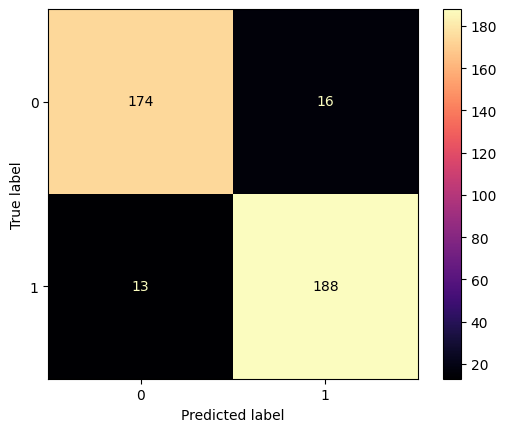

In [122]:
ConfusionMatrixDisplay.from_predictions(
    # y_test: this is the actual value of the output
    # y_test_pred : this is the naive beyes prediction

    y_test , y_test_pred ,
    labels= clf.classes_,
    cmap = 'magma'

)

TN FP       
FN TP   

Accuray = correctly predicted Samples / All Samples


 Accuracy = TN + TP / ALL SAMPLES
 Accuracy = 161 + 190 / 391
 Accuracy = 0.897 lasoo buuxiye: 0.90


 Precision = TP / TP + FP
 Precision = 190 / 29 + 190
 Precision = 0.867 laso buxiye: 0.87

Recall = TP  / TP + FN
Recall = 190 / 190 + 11
Recall = 0.95



F1score = 2 / (1/precision ) + (1/recall)



In [123]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'spam']))

              precision    recall  f1-score   support

         Ham       0.93      0.92      0.92       190
        spam       0.92      0.94      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



# Part 5: Predicting Unseen data

In [134]:
predict_data = vectorizer.transform(['This song is amazing',
                                     'You can win 1m dollars right now, just clck here!!!!',
                                     'good tutorial',
                                     'click here to win prizes'
                                     ])

In [135]:
clf.predict(predict_data)

array([0, 1, 0, 1])